Natalia Brzozowska
# Laboratorium 8
## Page Rank

***
### 1. Prosty ranking wierzchołków
**Zaimplementuj prosty model błądzenia przypadkowego po grafie skierowanym.(...). W
zapisie macierzowym:<br>
$r = dAr$,<br>
gdzie $A$ jest macierzą adiacencji grafu, w której każdy wiersz $u$ jest przeskalowany wyjściowym
stopniem wierzchołka $u$.<br>
Zauważ, że $r$ moze zostac obliczony jako dominujący wektor własny macierzy $A$ za
pomocą metody potęgowej (dominujący wektor własny $q1$ znormalizowany za pomoca
normy L1).
Przetestuj poprawność obliczeń korzystając z 3 dowolnych silnie spójnych
grafów skierowanych o liczbie wierzchołków większej niż 10.**
***

Na podstawie informacji zawartych w instrukcji oraz dokumencie http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf wiadomo, że $r=dAr$, gdzie
   * $A$ jest kwadratową macierzą adjacencji grafu, w której $A_{u,v}=1/N_{u}$ jeżeli istnieje krawędź od $u$ do $v$ lub $A_{u,v}=0$ w przeciwnym przypadku. 
   * $N_{u}= |F_{u}|$, przy czym $F_{u}$ oznacza zbiór wierzchołków, do których dochodzą krawędzie z wierzchołka $u$. 
   * $r$ jest wektorem zawierającym ranking wierzchołków
   * $d$ jest parametrem do normalizacji


Można jednak traktować $r$ jako dominujący wektor własny macierzy $A$, a $d$ jako jej wartość własną (odpowiadającą temu wektorowi własnemu).<br><br>
W celu obliczenia dominującego wektora własnego $r$ tej macierzy posłużę się metodą potęgową zaimplementowaną na wcześniejszych zajęciach. Zasada działania tej funkcji została opisana w nootebooku zawierającym rozwiązania laboratorium 7. Zamieszczam ją również poniżej:

>Funkcja power_method(matrix,n,eps) oblicza dominującą wartosć własną macierzy matrix i odpowiadajacy jej wektor własny. Parametr n oznacza maksymalną ilość iteracji - mnożenia wektora własnego x przez macierz matrix. Parametr eps oznacza maksymalną różnicę, między wektorem x z poprzedniej iteracji, a wektorem y z obecnej. Jeśli realna różnica err będzie mniejsza od eps program się zakończy (kryterium małej poprawki).
Funkcja ta opiera się na zasadzie działania metody potęgowej, czyli wielokrotnego mnożenia wektora własnego przez podaną macierz. Każdorazowo po pomnożeniu, wartość wektora zostaje podzielona przez normę "nieskończoność". Jeżeli różnica między kolejnymi wektorami będzie wystarczająco mała, algorytm zakończy działanie zwracając wektor własny x oraz wartość dominującą, którą w przybliżeniu jest element wektora x o największej wartości bezwzględnej.


Poniższa metoda zostala zmodyfikowana tak, że teraz zwraca wektor podzielony przez jego 1-normę, a nie, jak wcześniej, przez jego normę euklidesową.

In [718]:
import numpy as np

In [719]:
def power_method(matrix,n,eps):
    size=len(matrix)
    x=np.ones(size)
    k=1    
    while(k<=n):
        y=matrix@x
        u=max(abs(y))
        y=y/np.linalg.norm(y,np.inf)
        err=abs(np.linalg.norm(x-y))
        x=y
        if(err<eps):
            print("successful procedure")
            return u,x/np.linalg.norm(x,1)
                           
        k+=1
    print("maximum number of iterations exceeded")
    return u,x/np.linalg.norm(x,1)

Aby odpowiednio przedstawić i wygenerować losowy graf oraz utworzyć macierz adjacencji skorzystam z biblioteki networkx (wersja 1.10), dostarczającej wygodne funkcje do operacji na grafach.<br>

In [720]:
import networkx as nx
import matplotlib as mpl

In [721]:
def make_graph(n):
    G1=nx.DiGraph() 
    G1=nx.fast_gnp_random_graph(n,0.4, directed=True)
    while nx.is_strongly_connected(G1)!=True:
        G1=nx.fast_gnp_random_graph(n,0.4,directed=True)
    return G1

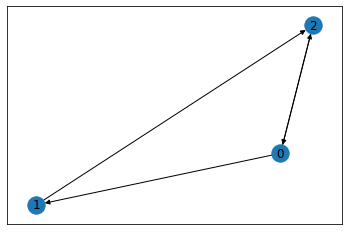

In [722]:
G=make_graph(3)
nx.draw_networkx(G,pos=nx.spring_layout(G))

Powyżej zdefiniowana funkcja makeGraph(n) przyjmuje jako argument liczbę wierzchołków grafu, który ma utworzyć, a następnie tworzy przykładowy graf skierowany korzystając z funkcji bibliotecznej. Jeżeli utworzony graf nie jest silnie spójny, to tworzony jest kolejny graf skierowany, aż do momentu utworzenia silnie spójnego grafu.<br><br>
Działanie zaimplementowanych funkcji pokażę na przykładzie grafu o 3 wierzchołkach, ponieważ tak, w łatwy sposób, można śledzić ich zachowanie. Na końcu punktu przetestuję poprawność obliczeń dla grafów o większej liczbie wierzchołków.

Aby móc znaleźć wektor r rankingu wierzchołków, należy teraz utworzyć macierz adjacencji A.

In [723]:
def make_A_matrix(G):
    n=len(G.nodes())
    A=np.zeros((n,n))
    edges_from_node=[]
    for node in G.nodes():
        edges_from_node.append(G.out_degree(node))
    for edge in G.edges():
        u=edge[0]
        v=edge[1]
        A[u][v]=1/edges_from_node[u]
    return A.T

In [724]:
A = make_A_matrix(G)
print(A)

[[0.  0.  1. ]
 [0.5 0.  0. ]
 [0.5 1.  0. ]]


Funkcja make_A_matrix(G) tworzy macierz adjacencji przeskalowaną przez wyjściowy stopień wierzchołka. Na początku macierz A wypełniana jest zerami. Następnie dla każdego wierzchołka zliczana i zapisywana w tablicy jest liczba krawędzi wychodzących z tego wierzchołka. Później dla każdej istniejącej krawędzi, wartość macierzy A, w komórce wyznaczonej przez wierzchołki połączone tą krawędzią, jest zmieniana zgodnie ze wzorem  $A_{u,v}=1/N_{u}$, gdzie wartości $N_{u}$ przechowywane są w tablicy edges_from_node. Na końcu macierz zostaje transponowana, tak aby wartości w kolumnach sumowały się do 1.

Posiadam już wszystkie potrzebne funkcje do obliczenia rankingu wierzchołków, zatem aby uzyskać pożądany wynik wystarczy teraz wywołać funkcję power_method na utworzonej macierzy.

In [725]:
val,vec = power_method(A,10000,1e-9)
print(vec)

print(nx.pagerank(G).values())

successful procedure
[0.4 0.2 0.4]
dict_values([0.387789442707259, 0.21481051315058508, 0.3974000441421556])


Powyżej został wypisany otrzymany wektor rankingu wierzchołków oraz wektor rankingu generowany przez funkcję biblioteczną. Wartości znajdujące sie w tych wektorach są podobne do siebie, jednak nie są identyczne.

***
Przetestuję teraz poprawność danych dla trzech różnych grafów.

1) graf skierowany, silnie spójny o 15 wierzchołkach

successful procedure
[[0.0310904  0.03640122]
 [0.05767825 0.05973578]
 [0.08537985 0.08235607]
 [0.07995243 0.07804161]
 [0.05667984 0.05788586]
 [0.05191941 0.05302752]
 [0.07530143 0.07562772]
 [0.09420524 0.09018329]
 [0.06873954 0.0689952 ]
 [0.08147011 0.07968723]
 [0.05981946 0.06083286]
 [0.08277232 0.07959543]
 [0.06886912 0.06788656]
 [0.08425156 0.08130084]
 [0.02187104 0.0284428 ]]
Are vectors similar:  True


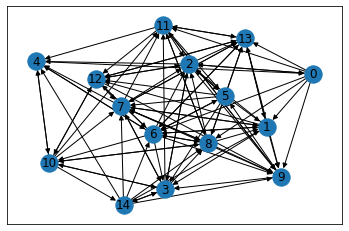

In [726]:
G1 = make_graph(15)
nx.draw_networkx(G1,pos=nx.spring_layout(G1))
A1 = make_A_matrix(G1)
val1,vec1 = power_method(A1,10000,1e-8)

linvec1 = list(nx.pagerank(G1).values())

results=np.array([vec1,linvec1])
print(results.T)
print("Are vectors similar: ",np.allclose(vec3,linvec3, atol=1e-2))

2) graf skierowany, silnie spójny o 23 wierzchołkach

successful procedure
[[0.04941708 0.04777513]
 [0.04243628 0.04299058]
 [0.03761757 0.03862177]
 [0.03059908 0.03235895]
 [0.03377446 0.03494193]
 [0.0396267  0.04015843]
 [0.05121969 0.05029054]
 [0.03932135 0.04013808]
 [0.03809666 0.03935947]
 [0.05118113 0.04930543]
 [0.04442373 0.04450183]
 [0.02604299 0.02826648]
 [0.06616507 0.06256266]
 [0.03587346 0.0367908 ]
 [0.05104906 0.04971178]
 [0.06259736 0.05942157]
 [0.01508818 0.01973209]
 [0.04876804 0.04911914]
 [0.05012782 0.04947296]
 [0.05934562 0.05666741]
 [0.02826254 0.03065507]
 [0.03901532 0.03938194]
 [0.05995082 0.05777594]]
Are vectors similar:  True


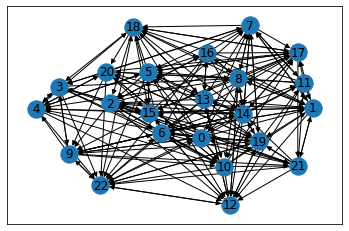

In [727]:
G2 = make_graph(23)
nx.draw_networkx(G2,pos=nx.spring_layout(G2))
A2 = make_A_matrix(G2)
val2,vec2 = power_method(A2,10000,1e-9)

linvec2 = list(nx.pagerank(G2).values())

results2=np.array([vec2,linvec2])
print(results2.T)
print("Are vectors similar: ",np.allclose(vec3,linvec3, atol=1e-2))

3) graf skierowany, silnie spójny o 30 wierzchołkach

successful procedure
[[0.02404469 0.02533406]
 [0.03947676 0.03849082]
 [0.02782642 0.02884509]
 [0.03903843 0.03826615]
 [0.02942152 0.03001763]
 [0.03453741 0.03449949]
 [0.04163101 0.04076233]
 [0.04452832 0.04279925]
 [0.02540246 0.02653025]
 [0.02787799 0.02863569]
 [0.02900649 0.02977896]
 [0.02802456 0.02885671]
 [0.03362445 0.03341909]
 [0.03502733 0.03481411]
 [0.03966814 0.03826587]
 [0.0264682  0.02734808]
 [0.02030389 0.02210578]
 [0.03826645 0.03734792]
 [0.03847371 0.03751833]
 [0.03721563 0.03624712]
 [0.0286409  0.02943031]
 [0.04048651 0.03986506]
 [0.03162861 0.03178895]
 [0.03224009 0.03255896]
 [0.04246327 0.04066963]
 [0.03204001 0.0327662 ]
 [0.04301686 0.0414415 ]
 [0.02810218 0.02901373]
 [0.01331222 0.01637099]
 [0.04820546 0.04621193]]
Are vectors similar:  True


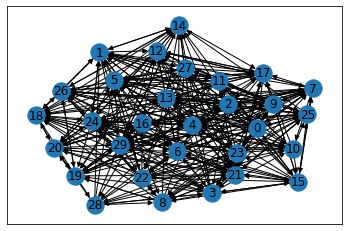

In [728]:
G3 = make_graph(30)
nx.draw_networkx(G3,pos=nx.spring_layout(G3))
A3 = make_A_matrix(G3)
val3,vec3 = power_method(A3,10000,1e-9)

linvec3 = list(nx.pagerank(G3).values())

results3=np.array([vec3,linvec3])
print(results3.T)
print("Are vectors similar: ",np.allclose(vec3,linvec3, atol=1e-2))

W powyższych przykładach zostały ze sobą zestawione wyniki uzyskane przy pomocy funkcji power_method() oraz bibliotecznej funkcji nx.pagerank(). Jak można zauważnyć często różnią się one od siebie na trzecim i dalszych miejscach po przecinku. Wartości te są więc bliskie jeśli w funkcji numpy.allclose() absolutną tolerancję błędu ustawimy na 1e-2. Rzędy wielkości wartości są takie same.<br>
Te różnice mogą wynikać z błędów reprezentacji liczb w komputerze, różnic w implementacji, jak równiez tego, że wyniki uzyskane przez zaimplementowane i zawarte tu funkcje dotyczyły prostego rankingu wierzchołków, a funkcja biblioteczna oblicza "właściwy" Page Rank, a więc uwzględnia "skoki".<br>

Przy pomocy metody potęgowej można w dość łatwy sposób uzyskać prosty ranking wierzchołków.<br>
Ten ranking może jednak "zapętlić się" w obrębie np. dwóch wierzchołków spośród wszystkich w grafie, z których nie ma przjścia do innego wierzchołka poza pętlą. Ta sytuacja jest uwzględniona w algorytmie Page Rank.

***
### 2. Page Rank
**Rozszerz model z poprzedniego zadania, dodając możliwość skoku do losowego wierzchołka
grafu.(...).Przetestuj działanie zaimplementowanego algorytmu Page Rank dla wybranych grafów
z bazy SNAP. Przetestuj różne wartości parametru d (0.9, 0.85, 0.75, 0.6, 0.5) oraz różne
postacie wektora e, przykładowo e = 1/
n [1, 1, . . . , 1].**
***

W algorytmie Page Rank, służącym uzyskaniu rankingu wierzchołków w grafie, wierzchołki tego grafu odpowiadają stronom internetowym, na które użytkownik może wejść, a krawędzie są linkami do tych stron znajdującymi się na innych stronach. W ten sposób - klikając na linki znajdujące się na stronach internetowych - użytkownik może poruszać się po tej "sieci" stron.<br>
Określając ranking wierzchołków - stron, można określić ich "ważność". Im większa jest wartość rankingu strony tym strona jest "ważniejsza" i istnieje większe prawdopodobieństwo trafienia na nią w internecie (bezpośrednio z danej strony sąsiedniej lub pośrednio przez inne strony internetowe niesąsidujące bezpośrednio z daną stroną).

<br><br>Aby zapobiec zapętleniu się w obrębie kilku wierzchołków w grafie, z których nie ma innej drogi jak tylko wykonać pętlę raz jeszcze, należy umożliwić zrobienie skoku do innego wierzchołka. W tym celu prowadza się wektor E, opisany poniżej.<br><br>
W postaci macierzowej, równanie, z którego korzysta się do obliczenia Page Rank, można przedstawić jako $r=(dA + (1-d)E x 1)$, gdzie:
   * $||r|| _{1} = 1$
   * $E$ jest parametrem zdefiniowanym przez użytkownika - wektorem zawierającym prawdopodobieństwo odwiedzenia wierzchołków przez losowy skok
   * $d$ jest parametrem podawanym przez użytkownika - współczynnikiem tłumienia, określającym prawdopodobieństwo pójścia do następnego wierzchołka (ponieważ możńa również pozostać na danym wierzchołku - stronie internetowej)
   
Aby zatem wyliczyć Page Rank, należy wyliczyć wartości dominującego wektora własnego macierzy $B = dA + (1-d)E x 1$. W tym celu skorzystam z metody potęgowej.

Żeby obliczyć wektor własny, potrzeba najpierw utworzyć odpowiednią macierz. Poniższa funkcja make_B_matrix() tworzy macierz B, korzystając z przekazanych argumentów: wartości d i wektora E i transponuje ją (tak jak poprzednio). Została również zamieszczona wersja funkcji make_A_matrix(), działająca na tej samej zasadzie ale korzystająca z funkcji biblioteki snap (wersja 5.0).

In [729]:
import snap

In [730]:
def make_A_matrix_snap(G):
    n=G.GetNodes()
    A=np.zeros((n,n))
    edges_from_node={}
    i=0
    for node in G.Nodes():
        edges_from_node[node.GetId()]=(node.GetOutDeg(),i)
        i+=1
    
    for edge in G.Edges():
        u=edge.GetSrcNId()
        v=edge.GetDstNId()
        nu=edges_from_node[u][0]
        uid=edges_from_node[u][1]
        vid=edges_from_node[v][1]
        
        A[uid][vid]=1/nu
    return A


def make_B_matrix(G,d,E):
    A=make_A_matrix_snap(G)
    N=G.GetNodes() # returns number of nodes in graph
    One = np.ones(len(E))
    
    B=(d*A)+(1-d)*E*One
    
    return B.T

def power_method(matrix,n,eps):
    size=len(matrix)
    x=np.ones(size)
    k=1    
    while(k<=n):
        y=matrix@x
        u=max(abs(y))
        y=y/np.linalg.norm(y,np.inf)
        
        y+=d*e
        err=abs(np.linalg.norm(x-y))
        x=y
        if(err<eps):
            print("successful procedure")
            return u,x/np.linalg.norm(x,1)
                           
        k+=1
    print("maximum number of iterations exceeded")
    return u,x/np.linalg.norm(x,1)

Korzystając z funkcji biblioteki snap załadowałam graf "wiki-Vote", składający się z 7115 wierzchołków i 103689 krawędzi. Za parametr d przyjęłam zwykle przyjmowaną wartość 0.85, a prawdopodobieństwa znajdujące się w wektorze E są równe 1/N, gdzie N to liczba wierzchołków. Korzystając z tych argumentów utworzyłam macierz B, na której wywołałam wcześniej zaimplementowaną i opisaną funkcję power_method(). 

In [731]:
G4 = snap.LoadEdgeList(snap.PNGraph,"wiki-Vote.txt",0,1)

In [732]:
d=0.85
E=np.ones(G4.GetNodes())
E=E/len(E)
B=make_B_matrix(G4,d,E)
va,ve = power_method(B,100000,0.0000000001)

print(ve)

successful procedure
[1.75062149e-04 8.15656008e-04 2.20947253e-03 ... 2.73333834e-05
 2.73333834e-05 2.73333834e-05]


W ten sposob otrzymałam dominujący wektor własny macierzy B. Aby sprawdzić poprawność działań wkorzystałam biblioteczne funkcje (m.in snap.GetPagerank()). Uzyskane wyniki zostały porównane poniżej.

In [733]:
En={}
for i in range(len(E)):
    En[i]=E[i]
    i+=1

PRanhH=En
snap.GetPageRank(G4,PRankH,d,0.0000000001,10000)
results=[]
for it in PRankH: 
    results.append(PRankH[it])
print(np.array(results))

[1.72871947e-04 8.14364040e-04 1.78395630e-03 ... 5.04883752e-05
 5.04883752e-05 5.04883752e-05]


In [734]:
print("Are vectors similar: ",np.allclose(results,ve, atol=1e-2))

Are vectors similar:  True


Powyższe porównanie pokazuje, że tak jak w poprzednim zadaniu, uzyskany z pomocą funkcji power_method() wektor jest podobny do wektora uzyskanego przy pomocy funkcji bibliotecznych. Dla absolutnej tolerancji 1e-2 funkcja porównująca wektory numpy.allclose() zwraca True, co oznacza, że są podobne z uwzględnieniem podanej tolerancji.<br>
Różnice mogą być spowodowane różnicą w implementacji metod czy błędami reprezentacji liczb w komputerze. <br><br>

Poniżej przedstawiam wyniki dla różnych wartości d oraz E.

In [735]:
def test(d,E):
    B=make_B_matrix(G4,d,E)
    va,ve = power_method(B,100000,0.0000000001)

    print(ve)

    En={}
    i=0
    for i in range(len(E)):
        En[i]=E[i]
        i+=1

    PRanhH=En
    snap.GetPageRank(G4,PRankH,d,0.0000000001,10000)
    results=[]
    for it in PRankH: 
        results.append(PRankH[it])
    print(np.array(results))
    print("Are vectors similar (1e-2): ",np.allclose(results,ve, atol=1e-2))
    print("Are vectors similar (1e-3): ",np.allclose(results,ve, atol=1e-3))
    print("Are vectors similar (1e-4): ",np.allclose(results,ve, atol=1e-4))

In [736]:
test(0.9, E)

successful procedure
[1.72350055e-04 7.77084474e-04 2.36543024e-03 ... 1.87192853e-05
 1.87192853e-05 1.87192853e-05]
[1.74035715e-04 8.24875578e-04 1.87024844e-03 ... 4.58014685e-05
 4.58014685e-05 4.58014685e-05]
Are vectors similar (1e-2):  True
Are vectors similar (1e-3):  False
Are vectors similar (1e-4):  False


In [737]:
test(0.75, E)

successful procedure
[1.74527902e-04 8.28481665e-04 1.91477326e-03 ... 4.33830147e-05
 4.33830147e-05 4.33830147e-05]
[1.69854480e-04 7.80172459e-04 1.60850841e-03 ... 6.00220510e-05
 6.00220510e-05 6.00220510e-05]
Are vectors similar (1e-2):  True
Are vectors similar (1e-3):  False
Are vectors similar (1e-4):  False


In [738]:
test(0.6, E)

successful procedure
[1.67945446e-04 7.55120339e-04 1.51258050e-03 ... 6.52392811e-05
 6.52392811e-05 6.52392811e-05]
[1.64187347e-04 6.99708876e-04 1.33764739e-03 ... 7.47647433e-05
 7.47647433e-05 7.47647433e-05]
Are vectors similar (1e-2):  True
Are vectors similar (1e-3):  True
Are vectors similar (1e-4):  False


In [739]:
test(0.5, E)

successful procedure
[1.62553381e-04 6.73272036e-04 1.26441276e-03 ... 7.87575542e-05
 7.87575542e-05 7.87575542e-05]
[1.60008871e-04 6.29307766e-04 1.15148751e-03 ... 8.49208901e-05
 8.49208901e-05 8.49208901e-05]
Are vectors similar (1e-2):  True
Are vectors similar (1e-3):  True
Are vectors similar (1e-4):  False


In [748]:
E=np.ones(G4.GetNodes())
E=E/(3*len(E))

In [749]:
test(0.85,E)

successful procedure
[1.66662366e-04 7.15924860e-04 2.50616178e-03 ... 1.06661061e-05
 1.06661061e-05 1.06661061e-05]
[1.72871947e-04 8.14364040e-04 1.78395630e-03 ... 5.04883752e-05
 5.04883752e-05 5.04883752e-05]
Are vectors similar (1e-2):  True
Are vectors similar (1e-3):  False
Are vectors similar (1e-4):  False


In [750]:
test(0.9,E)

successful procedure
[1.62558848e-04 6.78019081e-04 2.56754957e-03 ... 6.93742984e-06
 6.93742984e-06 6.93742984e-06]
[1.74035715e-04 8.24875578e-04 1.87024844e-03 ... 4.58014685e-05
 4.58014685e-05 4.58014685e-05]
Are vectors similar (1e-2):  True
Are vectors similar (1e-3):  False
Are vectors similar (1e-4):  False


In [751]:
test(0.5,E)

successful procedure
[1.74527902e-04 8.28481665e-04 1.91477326e-03 ... 4.33830147e-05
 4.33830147e-05 4.33830147e-05]
[1.60008871e-04 6.29307766e-04 1.15148751e-03 ... 8.49208901e-05
 8.49208901e-05 8.49208901e-05]
Are vectors similar (1e-2):  True
Are vectors similar (1e-3):  False
Are vectors similar (1e-4):  False


In [752]:
E=np.ones(G4.GetNodes())
E=E/20*len(E)

In [753]:
test(0.85,E)

successful procedure
[0.00014055 0.00014055 0.00014055 ... 0.00014055 0.00014055 0.00014055]
[1.72871947e-04 8.14364040e-04 1.78395630e-03 ... 5.04883752e-05
 5.04883752e-05 5.04883752e-05]
Are vectors similar (1e-2):  True
Are vectors similar (1e-3):  False
Are vectors similar (1e-4):  False


In [754]:
test(0.9,E)

successful procedure
[0.00014055 0.00014055 0.00014056 ... 0.00014055 0.00014055 0.00014055]
[1.74035715e-04 8.24875578e-04 1.87024844e-03 ... 4.58014685e-05
 4.58014685e-05 4.58014685e-05]
Are vectors similar (1e-2):  True
Are vectors similar (1e-3):  False
Are vectors similar (1e-4):  False


In [755]:
test(0.6,E)

successful procedure
[0.00014055 0.00014055 0.00014055 ... 0.00014055 0.00014055 0.00014055]
[1.64187347e-04 6.99708876e-04 1.33764739e-03 ... 7.47647433e-05
 7.47647433e-05 7.47647433e-05]
Are vectors similar (1e-2):  True
Are vectors similar (1e-3):  False
Are vectors similar (1e-4):  False


Pierwsza część testów została wykonana dla E=1/N, gdzie N to liczba wierzchołków w grafie.<br>
Można zauważyć, że dla coraz mniejszego d, wyniki uzyskane przy pomocy funkcji power_method() są coraz bardziej podobne do tych uzyskanych przy pomocy funkcji bibliotecznych. Jednocześnie dla mniejszych d wartości wierzchołków o wyższej pozycji w rankingu nieznacznie spadają, a tych o niższej pozycji nieznacznie rosną.<br>
Dla niższych wartości wektora E, rezultat wyliczony przez power_method() jest dość różny od tego uzyskanego funkcjami bibliotecznymi. Zgadza się co prawda dla toleracji błedu 1e-2, jednak można zauważyć, że otrzymane wartości nie są tak bliskie jak dla wcześniejszych przykładów, gdzie w zakresie danej telerancji wyniki równiez były podobne.

Podsumowując, ranking wierzchołków można łatwo otrzymać korzystając z metody potęgowej. Dla wartości wektora E równych 1/N[1,1,1,....1,1], niezaleznie od d, otrzymane wyniki są w miarę poprawne. Dla innych wartości E ta metoda nie daje odpowiednich rezultatów (jednak może to być spowodowane nie do końca poprawną implementacją).<br>
Zmiana wartości parametru d - współczynnika tłumienia - powoduje niewielkie zmiany w obrębie wartości rankingu wierzchołków: im mniejsza jest wartość d tym bardziej maleje pozycja lepiej "notowanych" wierzchołków, a rośnie pozycja gorzej "notowanych" wierzchołków.
***

Korzystając z takich metod dla bardzo dużych grafów, można spotkać się z problem przechowywania tak ogromnej macierzy adjacencji w pamięci. Również wykonywanie obliczeń na tak dużej macierzy może być bardzo długotrwałe, a wyniki rankingu wierzchołków mogą różnić się na "dalekim" miejscu po przecinku (jeśli graf ma bardzo wiele krawędzi). Może to spowodować nieprawidłowości w utworzonym rankingu, ponieważ obliczenia na bardzo małych liczbach mogą powodować błędy (m.in underflow).